# Import data
- find optimal locations

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("../Documents/Data/Design2/Neighborhoods-Current Demand.csv")
df.head()

coords = df[['Longitude', 'Latitude']].values

CAPACITY = 50000

# Draw Data

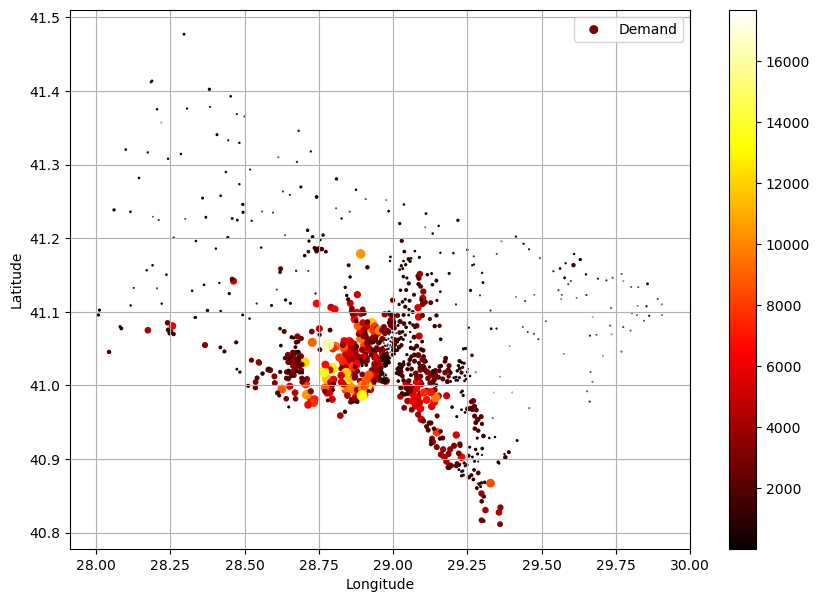

In [2]:
import matplotlib.pyplot as plt

df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=df["EV at P4"]/300, label="Demand",
             c=df["EV at P4"], cmap="hot", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7), alpha=1)
plt.show()

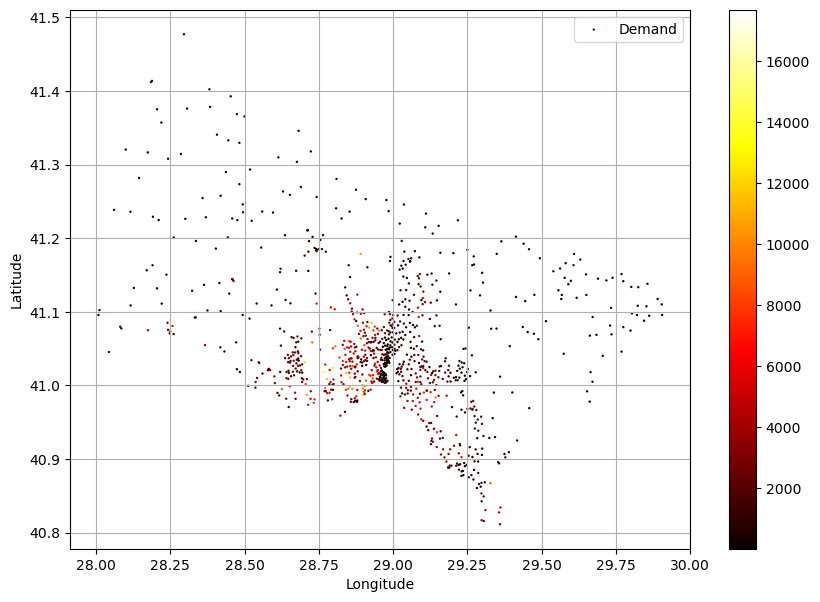

In [3]:
df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=0.5, label="Demand",
             c=df["EV at P4"], cmap="hot", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7), alpha=1)
plt.show()

# Cluster

Clustering algorith function

In [88]:
!pip install --upgrade scikit-learn
import sklearn
print(sklearn.__version__)

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/ff/919087b9aa5318c3992def31b74e019eee39c57ff6bf140289041df3db86/scikit_learn-1.4.1.post1-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 6.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
1.3.0


In [78]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

### cluster with k-means
def cluster_gt(data, period, station_number, capacity_limit):
    # Extract coordinates and demand as numpy arrays
    coords = data[['Longitude', 'Latitude']].values
    demand = data['EV at P' + str(period)].values

    # Define number of clusters and capacity of each cluster
    k = station_number # You can change this according to your needs
    capacity = capacity_limit # You can change this according to your needs

    # Initialize K-Means with random centroids
    km = KMeans(n_clusters=k, init='random', n_init='auto')
    km.fit(coords)

    # Get initial cluster labels and centroids
    labels = km.labels_
    centroids = km.cluster_centers_

    # Initialize cluster capacities as zero
    capacities = np.zeros(k)

    # Loop over the points and assign them to the nearest cluster that has enough capacity
    for i in range(len(coords)):
        # Find the nearest cluster to the point
        dist = np.linalg.norm(coords[i] - centroids, axis=1)
        nearest = np.argmin(dist)

        # Check if the cluster has enough capacity
        if capacities[nearest] + demand[i] <= capacity:
            # Assign the point to the cluster
            labels[i] = nearest
            # Update the cluster capacity
            capacities[nearest] += demand[i]
        else:
            # Find the next nearest cluster that has enough capacity
            dist[nearest] = np.inf # Exclude the nearest cluster from the search
            next_nearest = np.argmin(dist)
            # Repeat until a suitable cluster is found or all clusters are full
            while capacities[next_nearest] + demand[i] > capacity and not np.isinf(dist).all():
                dist[next_nearest] = np.inf # Exclude the next nearest cluster from the search
                next_nearest = np.argmin(dist)
            # If a suitable cluster is found, assign the point to it
            if capacities[next_nearest] + demand[i] <= capacity:
                labels[i] = next_nearest
                capacities[next_nearest] += demand[i]
            # Otherwise, the point cannot be assigned to any cluster
            else:
                labels[i] = -1 # Label the point as an outlier

    # Recompute the cluster centroids based on the new labels
    centroids = np.array([coords[labels == i].mean(axis=0) for i in range(k)])
    return labels, centroids




In [76]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering

### cluster with k-means
def cluster_gtb(data, period, station_number, capacity_limit):
    # Extract coordinates and demand as numpy arrays
    coords = data[['Longitude', 'Latitude']].values
    demand = data['EV at P' + str(period)].values

    # Define number of clusters and capacity of each cluster
    k = station_number # You can change this according to your needs
    capacity = capacity_limit # You can change this according to your needs

    # Initialize K-Means with random centroids
    km = AgglomerativeClustering(n_clusters=k, linkage='ward')
    km.fit(coords)

    # Get initial cluster labels and centroids
    labels = km.labels_
    # centroids = km.cluster_centers_

    # Initialize cluster capacities as zero
    capacities = np.zeros(k)

    # Loop over the points and assign them to the nearest cluster that has enough capacity
    for i in range(len(coords)):
        # Find the nearest cluster to the point
        dist = np.linalg.norm(coords[i] - centroids, axis=1)
        nearest = np.argmin(dist)

        # Check if the cluster has enough capacity
        if capacities[nearest] + demand[i] <= capacity:
            # Assign the point to the cluster
            labels[i] = nearest
            # Update the cluster capacity
            capacities[nearest] += demand[i]
        else:
            # Find the next nearest cluster that has enough capacity
            dist[nearest] = np.inf # Exclude the nearest cluster from the search
            next_nearest = np.argmin(dist)
            # Repeat until a suitable cluster is found or all clusters are full
            while capacities[next_nearest] + demand[i] > capacity and not np.isinf(dist).all():
                dist[next_nearest] = np.inf # Exclude the next nearest cluster from the search
                next_nearest = np.argmin(dist)
            # If a suitable cluster is found, assign the point to it
            if capacities[next_nearest] + demand[i] <= capacity:
                labels[i] = next_nearest
                capacities[next_nearest] += demand[i]
            # Otherwise, the point cannot be assigned to any cluster
            else:
                labels[i] = -1 # Label the point as an outlier

    # Recompute the cluster centroids based on the new labels
    centroids = np.array([coords[labels == i].mean(axis=0) for i in range(k)])
    return labels, centroids




In [95]:
# Import libraries
from sklearn.cluster import HDBSCAN


### cluster with HDBSCAN
def cluster_gta(data, period):
  # Extract coordinates and demand as numpy arrays
  coords = data[['Longitude', 'Latitude']].values
  demand = data['EV at P' + str(period)].values

  # Initialize K-Means with random centroids 
  hd = HDBSCAN(min_cluster_size=3, max_cluster_size=50)
  hd.fit(coords)

  # Get initial cluster labels and centroids
  labels = hd.labels_
  centroids = hd.cluster.centroids
  k = np.unique(labels[labels != -1]).shape[0]


  # Initialize cluster capacities as zero
  capacities = np.zeros(k)
  # Loop over the points and assign them to the nearest cluster that has enough capacity
  for i in range(len(coords)):
      # Find the nearest cluster to the point
      dist = np.linalg.norm(coords[i] - centroids, axis=1)
      nearest = np.argmin(dist)

      # Check if the cluster has enough capacity
      if capacities[nearest] + demand[i] <= capacity:
          # Assign the point to the cluster
          labels[i] = nearest
          # Update the cluster capacity
          capacities[nearest] += demand[i]
      else:
          # Find the next nearest cluster that has enough capacity
          dist[nearest] = np.inf # Exclude the nearest cluster from the search
          next_nearest = np.argmin(dist)
          # Repeat until a suitable cluster is found or all clusters are full
          while capacities[next_nearest] + demand[i] > capacity and not np.isinf(dist).all():
              dist[next_nearest] = np.inf # Exclude the next nearest cluster from the search
              next_nearest = np.argmin(dist)
          # If a suitable cluster is found, assign the point to it
          if capacities[next_nearest] + demand[i] <= capacity:
              labels[i] = next_nearest
              capacities[next_nearest] += demand[i]
          # Otherwise, the point cannot be assigned to any cluster
          else:
              labels[i] = -1 # Label the point as an outlier

  # Recompute the cluster centroids based on the new labels
  # centroids = np.array([coords[labels == i].mean(axis=0) for i in range(k)])
  return labels, centroids




# Testing

In [53]:
# Returns the number of unassigned points
def numof_unassigned_points(labels):
  l = labels
  return (np.count_nonzero(l == -1))

In [54]:
# Returns the total distance error in kms
def distance_error(data, labels, centroids):
  coords = data[['Longitude', 'Latitude']].values
  error = np.sum(np.linalg.norm(coords - centroids[labels], axis=1))
  return error

In [55]:
# Import matplotlib
import matplotlib.pyplot as plt

def draw_map(centroids, labels):
  c = centroids
  l = labels
  plt.figure(figsize=(15,10))

  # Plot the data points with cluster labels
  plt.scatter(coords[:, 0], coords[:, 1], c=l, s=5)
  # plt.scatter(coords[:, 0], coords[:, 1], s=5)

  # Plot the centroids as red squares
  plt.scatter(c[:, 0], c[:, 1], marker='s', c='red', s=30)

  # Show the plot
  plt.show()

# Test phase

In [56]:
def test_gt(data, capacity, chargep_max, step_rate, max_distance_error, max_unassigned_point=0):
  disk = []
  for i in range(1, 7):
    for j in range(1, chargep_max, step_rate):
      _l, _c = cluster_gt(data, i, j, capacity)
      de = distance_error(data, _l, _c)
      pe = numof_unassigned_points(_l)
      if pe <= max_unassigned_point and de < max_distance_error:
        disk.append('CS at P'+str(i)+': '+str(j))
        print(int(de))
        break

  if len(disk) < 6:
    print('There are points that not assigned to a charging stations!!!')
  else:
    print('All points are assigned!')

  return disk


In [74]:
CAPACITY = 60000
test_gt(data=df, capacity=CAPACITY, chargep_max=100, step_rate=5, max_distance_error=45, max_unassigned_point=0)

43
42
37
42
44
41
All points are assigned!


['CS at P1: 21',
 'CS at P2: 21',
 'CS at P3: 31',
 'CS at P4: 51',
 'CS at P5: 61',
 'CS at P6: 76']

In [96]:
l, c = cluster_gta(data=df, period=3)
draw_map(c, l)

AttributeError: 'HDBSCAN' object has no attribute 'cluster'

# NetworkX Draw

In [12]:
pip install networkx osmnx


Note: you may need to restart the kernel to use updated packages.


In [35]:
import networkx as nx
import osmnx as ox

In [36]:
G = ox.graph_from_place("Istanbul, Turkey")

In [ ]:
G1 = ox.graph_from_bbox(bbox=(41.3830, 40.7056, 29.8526, 28.6166))

In [ ]:
l, c = cluster_gt(df, 6, 151, CAPACITY)
print(c[:5])

In [38]:
import copy
g1 = copy.deepcopy(G)
g2 = copy.deepcopy(G)

In [ ]:
g2.remove_nodes_from(list(g1.nodes))

In [ ]:
list(g2.nodes)[:5]

In [ ]:
g2.nodes[21138837]

In [ ]:
# Assuming you have your OSMnx graph loaded in a variable 'G'
for location in c:
    lat, lon = location
    g2.add_node(g2, attr:{x=lat, y:lon, street_count:1})
    
for location in coords:
    lat, lont = location
    g2.add_node(g2, id=location, x=lon, y=lat, color='blue', size=5)


In [ ]:
for node1 in g2.nodes:
    for node2 in g2.nodes:
        if node1 != node2:
            g2.add_edge(node1, node2)

In [ ]:
len(list(g2.nodes))

In [ ]:
g2.remove_nodes_from(list(g1.nodes)[:285000])

In [ ]:
len(list(g2))

In [ ]:
list(g2)[100:105]

In [ ]:
print(g2.nodes[34157053])
g2.nodes[34157053].color='red'
g2.nodes[34157053].size=20000

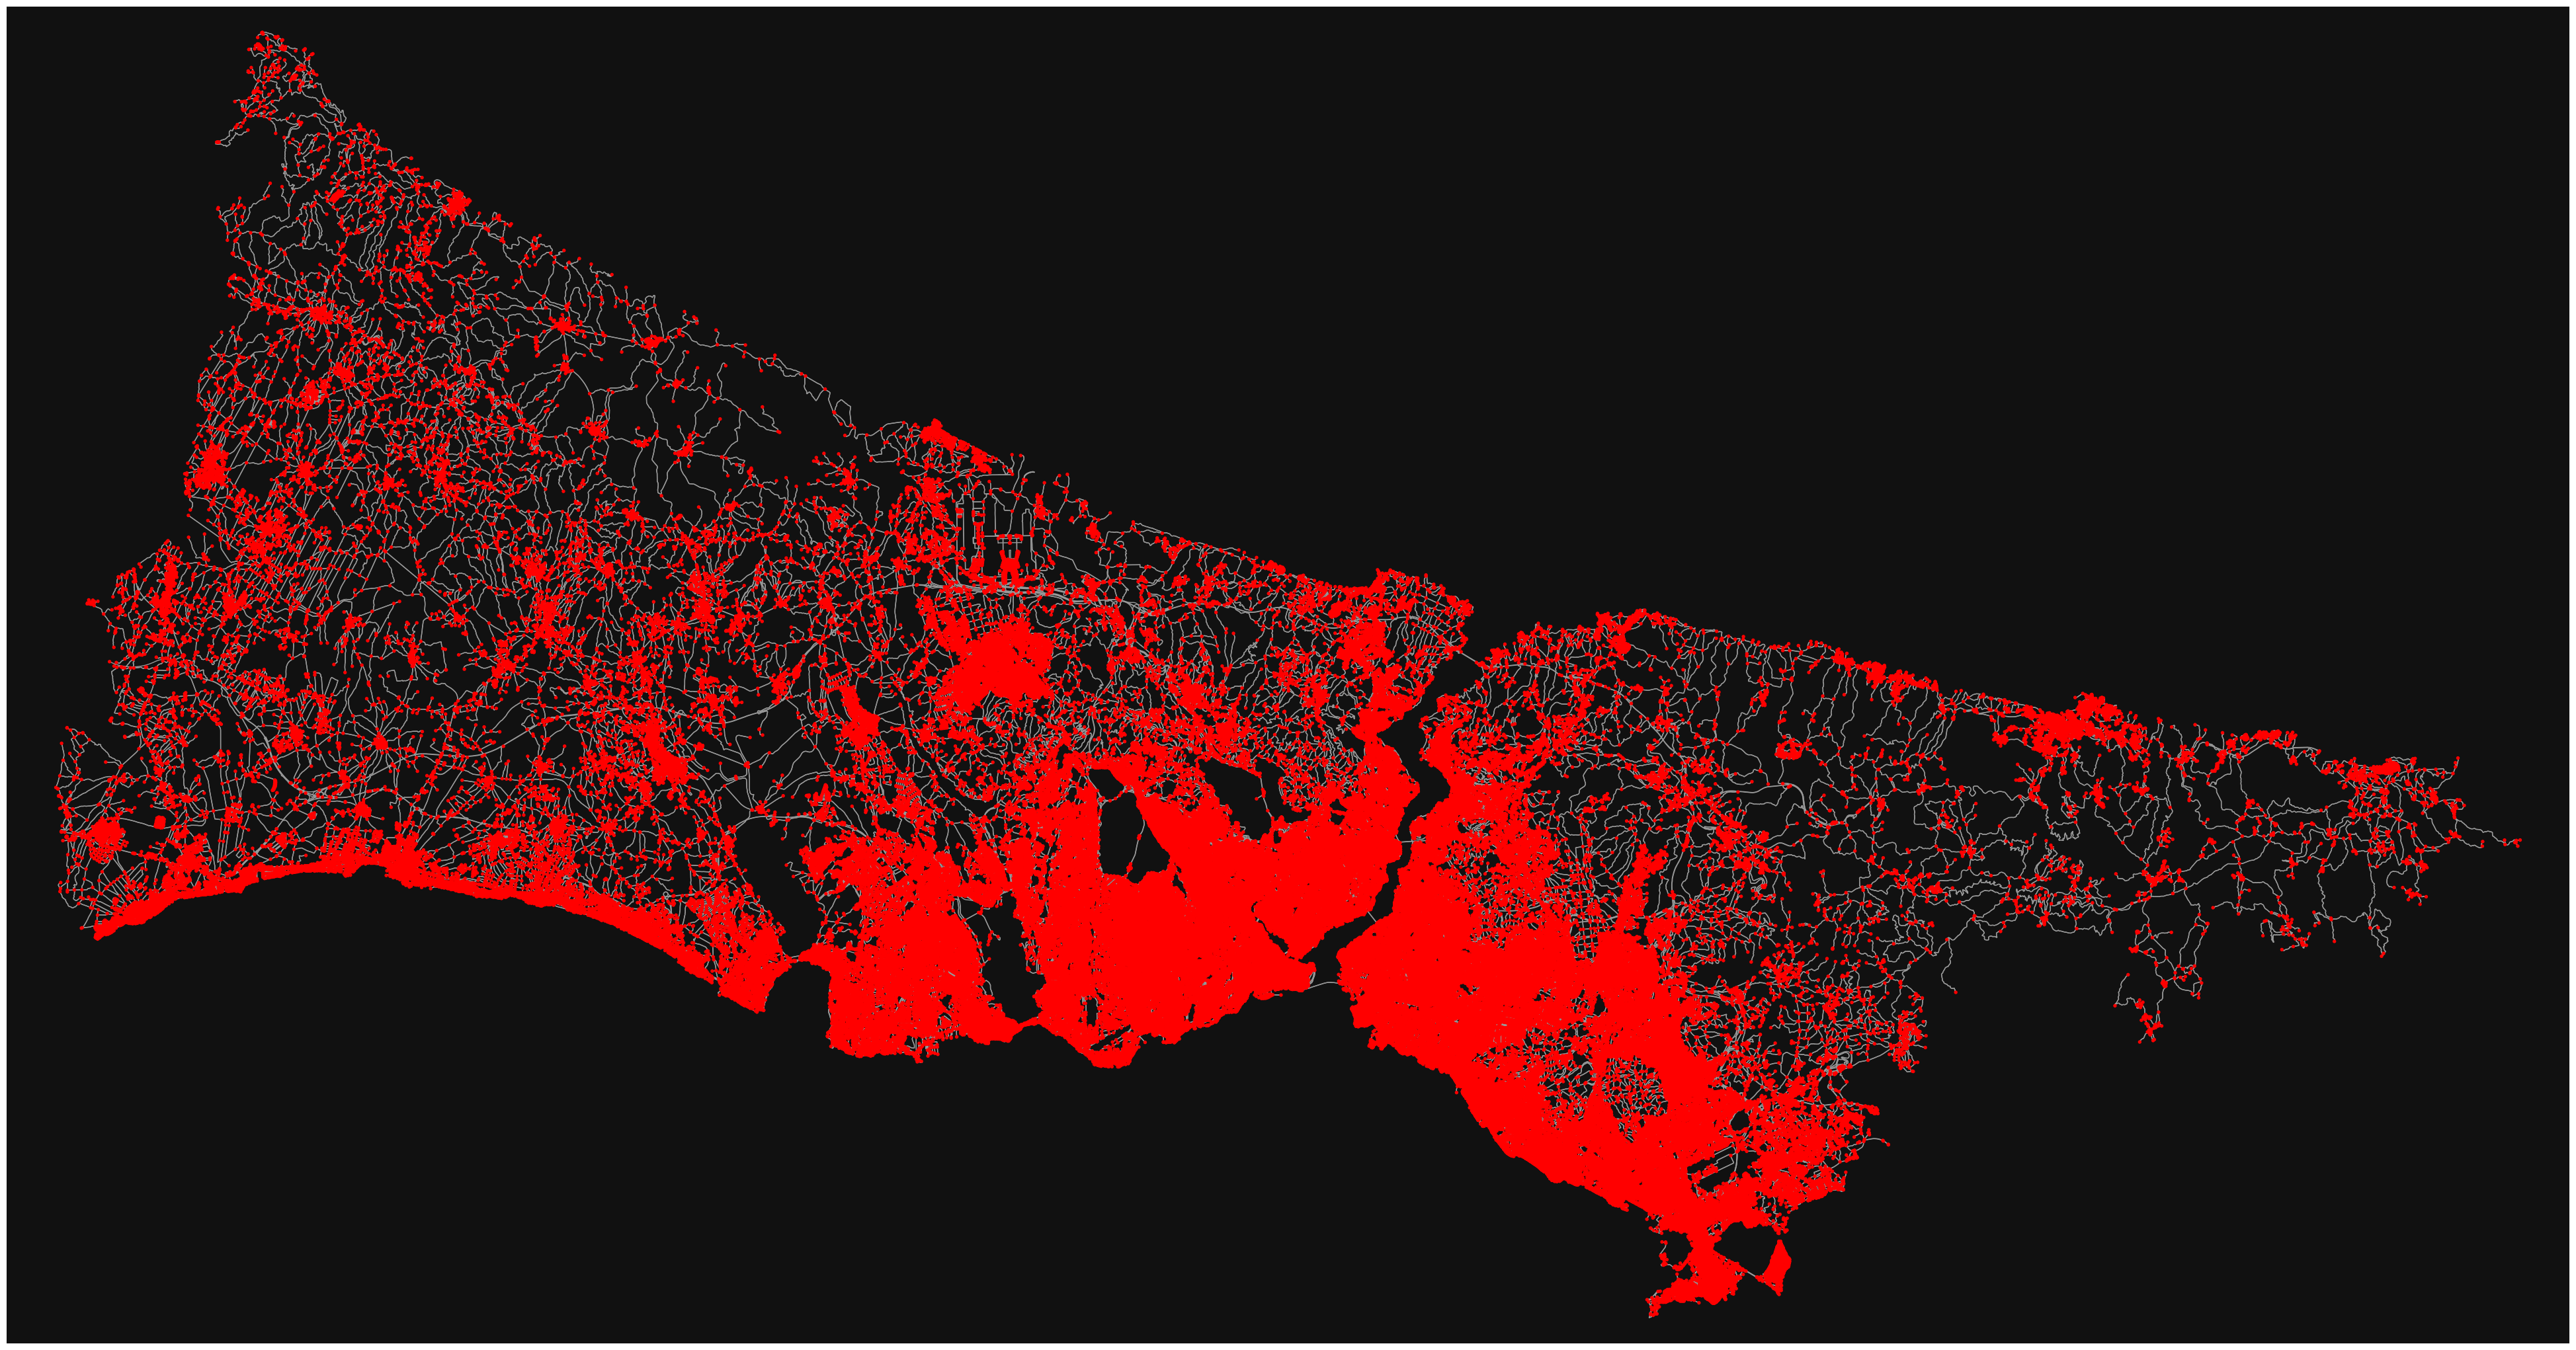

(<Figure size 5000x5000 with 1 Axes>, <Axes: >)

In [39]:
ox.plot.plot_graph(g2, dpi=10000, figsize = (50,50), node_color='red')

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define bounding box coordinates for Istanbul (adjust as needed)
loc = 41.3, 40.8, 29.1, 28.6

# Get OpenStreetMap data for Istanbul highways
graph = ox.graph_from_bbox(bbox=loc, network_type='drive')

# Extract highways (motorway, trunk, primary)
highways = [way for way, data in graph.edges(keys=True) if 'highway' in data and 
            data['highway'] in ['motorway', 'trunk', 'primary']]

# Create a subgraph of Istanbul highways
highway_graph = graph.subgraph(highways)

# Plot the highway network
nx.draw_networkx(highway_graph, cmap='tab20')
plt.title('Istanbul Highways')
plt.show()

# Calculate and draw possible optimal charging locations (working)

In [ ]:
# Import scipy
from scipy.spatial import distance

# Define the possible locations as a numpy array
# Each row is a location, each column is a coordinate
possible_locations = pd.read_csv("/content/drive/Othercomputers/MacBook Air'im/Documents/Data/Export-Possible Locations.csv")
pl_coords = possible_locations[["Longitude", "Latitude"]].to_numpy()

# Define the cluster centers as a numpy array
# Each row is a cluster center, each column is a coordinate
charge_locations = []

closest_ids = []
# Loop over the cluster centers and find the closest location to each one
'''
for center in enumerate(centroids):
    # Calculate the Euclidean distance between the center and each possible location
    distances = [distance.euclidean(center, location) for location in pl_coords]

    print(distances[0])
    # Find the index of the smallest distance
    closest_idx = np.argmin(distances)
    closest_ids.append(closest_idx)
    # Print the closest location and its distance to the center
    # charge_locations.append(pl_coords[closest_idx])
    # print(f'Cluster {i}: Closest location is {possible_locations[closest_idx]} with distance {distances[closest_idx]}')
'''

nearest_locations = []
for i in range(len(centroids)):
  dist = np.linalg.norm(centroids[i] - pl_coords, axis=1)
  nearest = np.argmin(dist)
  nearest_locations.append(nearest)

charge_locations = np.copy(pl_coords[nearest_locations])
print(nearest_locations)

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


# Plot the data points with cluster labels
plt.scatter(coords[:, 0], coords[:, 1], c=labels, s=5)

# Plot the centroids as red squares
plt.scatter(charge_locations[:, 0], charge_locations[:, 1], marker='s', color='red', s=30)



# Show the plot
plt.show()